In [1]:
%pip install pandas
%pip install wget
%pip install numpy
%pip install scipy
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas
import wget
from datetime import datetime

wget.download("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/microsoft_custom_linear_regressor.py")
wget.download("https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv")
 
# Load a file that contains our weather data
dataset = pandas.read_csv('seattleWeather_1948-2017.csv', parse_dates=['date'])
 
# Convert the dates into numbers so we can use them in our models
# We make a year column that can contain fractions. For example,
# 1948.5 is halfway through the year 1948
dataset["year"] = [(d.year + d.timetuple().tm_yday / 365.25) for d in dataset.date]
 
 
# For the sake of this exercise, let's look at February 1 for the following years:
desired_dates = [
    datetime(1950,2,1),
    datetime(1960,2,1),
    datetime(1970,2,1),
    datetime(1980,2,1),
    datetime(1990,2,1),
    datetime(2000,2,1),
    datetime(2010,2,1),
    datetime(2017,2,1),
]
 
dataset = dataset[dataset.date.isin(desired_dates)].copy()
 
# Print the dataset
dataset

,date,amount_of_precipitation,max_temperature,min_temperature,rain,year
762,1950-02-01,0.00,27,1,False,1950.087611
4414,1960-02-01,0.15,52,44,True,1960.087611
8067,1970-02-01,0.00,50,42,False,1970.087611
11719,1980-02-01,0.37,54,36,True,1980.087611
15372,1990-02-01,0.08,45,37,True,1990.087611
19024,2000-02-01,1.34,49,41,True,2000.087611
22677,2010-02-01,0.08,49,40,True,2010.087611
25234,2017-02-01,0.00,43,29,False,2017.087611


In [3]:
import numpy
 
def sum_of_square_differences(estimate, actual):
    # Note that with NumPy, to square each value we use **
    return numpy.sum((estimate - actual)**2)
 
def sum_of_absolute_differences(estimate, actual):
    return numpy.sum(numpy.abs(estimate - actual))

Describes two loss functions, SSD and SAD.

In [4]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([2, 2])
 
print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))

SSD: 2
SAD: 2


In [5]:
actual_label = numpy.array([1, 3])
model_estimate = numpy.array([1, 1])
 
print("SSD:", sum_of_square_differences(model_estimate, actual_label))
print("SAD:", sum_of_absolute_differences(model_estimate, actual_label))

SSD: 4
SAD: 2


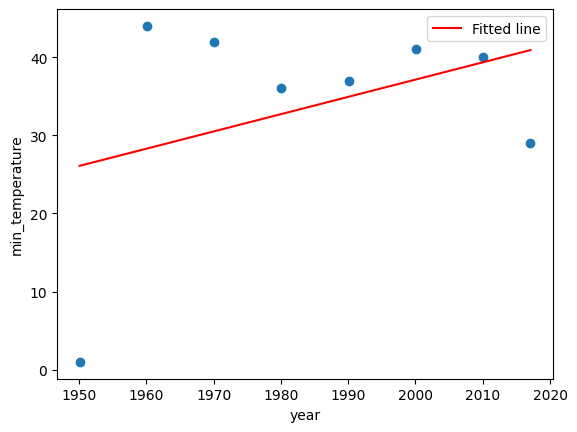

In [6]:
from microsoft_custom_linear_regressor import MicrosoftCustomLinearRegressor
import matplotlib.pyplot as plt
 
# Create and fit the model
# We use a custom object that we've hidden from this notebook, because
# you don't need to understand its details. This fits a linear model
# by using a provided cost function
 
# Fit a model by using sum of square differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year, 
                                             y = dataset.min_temperature, 
                                             cost_function = sum_of_square_differences
                                             )
 
# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')
 
                                                 
# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()

Calls a Linear Regressor that works with any custom cost function. Its has the function fit and inside of it estimate_and_calc_error(coeff) this predicts a value and runs it through the cost function. Inside fit we first assume them to be 0,0 then call SciPy's minimize method to reduce cost. The values are saved and used in the predict function to get values of y. Uses the slope-intercept line equation

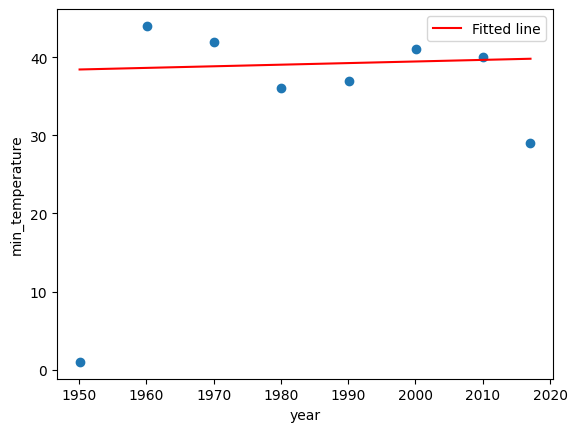

In [7]:
# Fit a model with SAD
# Fit a model by using sum of absolute differences
model = MicrosoftCustomLinearRegressor().fit(X = dataset.year, y = dataset.min_temperature, cost_function = sum_of_absolute_differences)
 
# Graph the model
plt.scatter(dataset["year"], dataset["min_temperature"])
plt.plot(dataset["year"], model.predict(dataset["year"]), 'r', label='Fitted line')
 
                                                 
# add labels and legend
plt.xlabel("year")
plt.ylabel("min_temperature")
plt.legend()